In [1]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import matplotlib.pyplot as plt

# Tumor Slide

In [2]:
adata_L = anndata.read_h5ad('Patient1_L.h5ad')
adata_T = anndata.read_h5ad('Patient1_T.h5ad')

/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


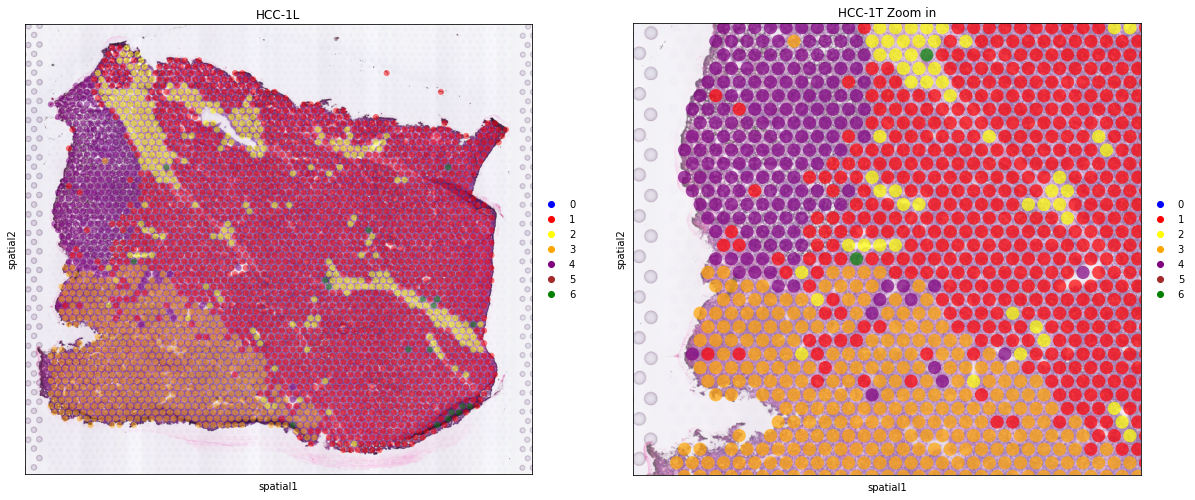

In [3]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sc.pl.spatial(adata_T, img_key="hires", color="cluster",
              alpha=0.5, size=1.3, ax = ax[0], title = 'HCC-1L', show = False)
sc.pl.spatial(adata_T, img_key="hires", color="cluster", size = 1.3, alpha = 0.7,
              alpha_img=0.7, title = 'HCC-1T Zoom in', ax = ax[1], crop_coord=[3500, 10000, 7500, 13300], show = False)
plt.show()

In [4]:
adata_T_tumor = adata_T[(adata_T.obs['cluster'] == '1') | (adata_T.obs['cluster'] =='3') | (adata_T.obs['cluster'] =='4')]

/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


         Falling back to preprocessing with `sc.pp.pca` and default params.


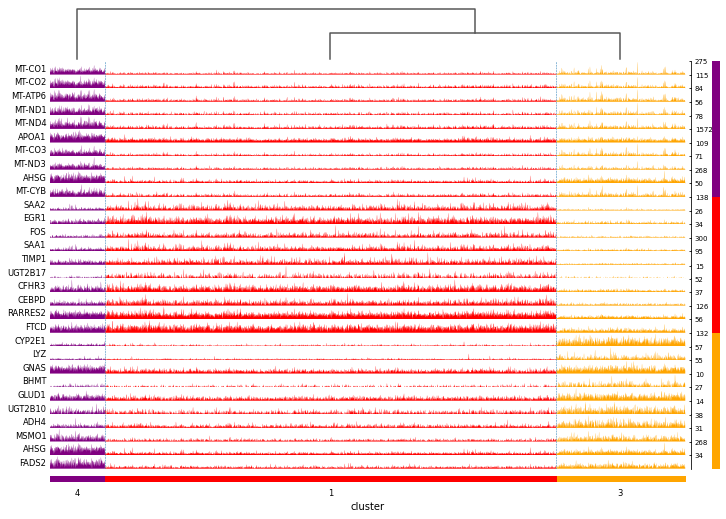

In [5]:
sc.tl.rank_genes_groups(adata_T_tumor, groupby='cluster',
                        method='wilcoxon', n_genes=20, raw=True)
adata_T_tumor.var_names_make_unique()
sc.pl.rank_genes_groups_tracksplot(adata_T_tumor, groupby='cluster', use_rep='X', n_genes = 10)

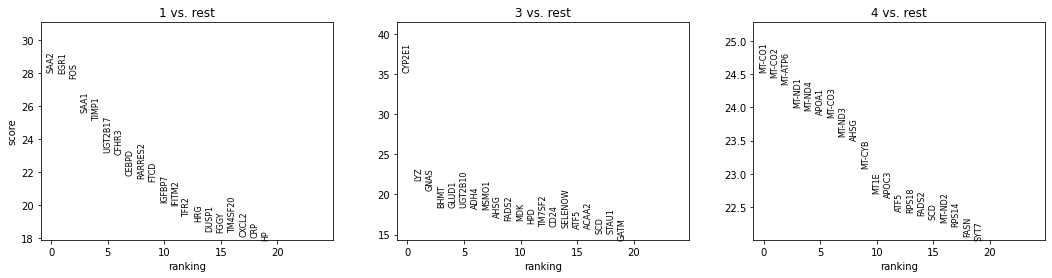

In [6]:
sc.pl.rank_genes_groups(adata_T_tumor, n_genes=25, sharey=False, key = "rank_genes_groups")

In [7]:
T1_DEG = []
T3_DEG = []
T4_DEG = []
for p in adata_T_tumor.uns['rank_genes_groups']['names']:
    T1_DEG.append(p[0])
    T3_DEG.append(p[1])
    T4_DEG.append(p[2])

# Leading Edge Slide

In [8]:
import rdata

In [9]:
parsed = rdata.parser.parse_file("CellChatDB.human.rda")
converted = rdata.conversion.convert(parsed)

In [10]:
#filter out all overlapping genes
LR_meta = converted['CellChatDB.human']['interaction']
LR = LR_meta.loc[:, ['ligand', 'receptor']]
ST_genes = list(adata_L.var_names)
LR_common_pairs = []
for i in range(LR.shape[0]):
    if (LR.iloc[i,0] in ST_genes) and (LR.iloc[i,1] in ST_genes):
        LR_common_pairs.append((LR.iloc[i,0], LR.iloc[i,1]))

In [11]:
LR_common_ligand = []
for pair in LR_common_pairs:
    LR_common_ligand.append(pair[0])
    
LR_common_receptor = []
for pair in LR_common_pairs:
    LR_common_receptor.append(pair[1])

In [12]:
adata_L.var_names_make_unique()
adata_L_ligand = adata_L[:, LR_common_ligand].copy()
adata_L_ligand = adata_L_ligand[(adata_L_ligand.obs['invasive_frontier'] == 'Normal side') | (adata_L_ligand.obs['invasive_frontier'] == 'Tumor side')].copy()

/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


         Falling back to preprocessing with `sc.pp.pca` and default params.


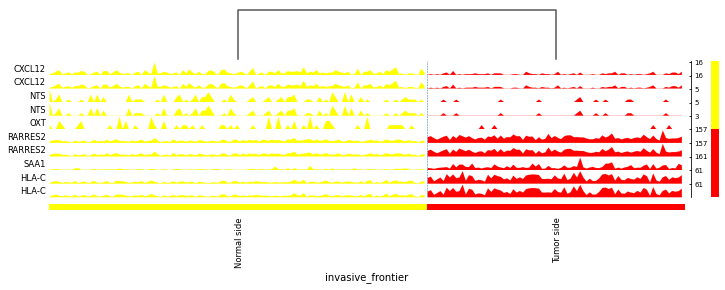

In [13]:
sc.tl.rank_genes_groups(adata_L_ligand, groupby='invasive_frontier',
                        method='wilcoxon', n_genes=50, raw=True)
adata_L_ligand.var_names_make_unique()
sc.pl.rank_genes_groups_tracksplot(adata_L_ligand, groupby='invasive_frontier', use_rep='X', n_genes = 5)

In [14]:
Tumor_up_ligands = []
for p in adata_L_ligand.uns['rank_genes_groups']['names']:
    Tumor_up_ligands.append(p[1])

In [15]:
adata_L.var_names_make_unique()
adata_L_receptor = adata_L[:, LR_common_receptor].copy()
adata_L_receptor = adata_L_receptor[(adata_L_receptor.obs['invasive_frontier'] == 'Stromal-normal interface') | (adata_L_receptor.obs['invasive_frontier'] == 'Stromal-tumor interface')].copy()

/opt/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


         Falling back to preprocessing with `sc.pp.pca` and default params.


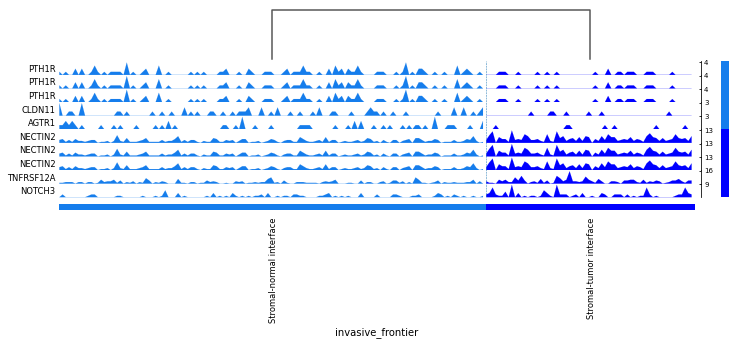

In [16]:
sc.tl.rank_genes_groups(adata_L_receptor, groupby='invasive_frontier',
                        method='wilcoxon', n_genes=50, raw=True)
adata_L_receptor.var_names_make_unique()
sc.pl.rank_genes_groups_tracksplot(adata_L_receptor, groupby='invasive_frontier', use_rep='X', n_genes = 5)

# Ligand-receptor Analysis

In [17]:
Tumor_up_receptors = []
for p in adata_L_receptor.uns['rank_genes_groups']['names']:
    Tumor_up_receptors.append(p[1])

In [18]:
enriched_LR_pairs = []
for pair in LR_common_pairs:
    ligand = pair[0]
    receptor = pair[1]
    if (ligand in Tumor_up_ligands) and (receptor in Tumor_up_receptors):
        enriched_LR_pairs.append((ligand, receptor))

In [19]:
enriched_LR_pairs

[('COL4A1', 'SDC4'), ('FN1', 'SDC4')]

In [20]:
enriched_LR_pairs_meta = LR_meta.loc[(LR_meta.ligand == 'COL1A2') & (LR_meta.receptor == 'SDC4') | \
            (LR_meta.ligand == 'COL4A1') & (LR_meta.receptor == 'SDC4') | \
            (LR_meta.ligand == 'FN1') & (LR_meta.receptor == 'SDC4'), :]

In [21]:
enriched_LR_pairs_meta = enriched_LR_pairs_meta.drop(columns=['agonist', 'antagonist', 'co_A_receptor', 'co_I_receptor'])

In [22]:
enriched_LR_pairs_meta

,interaction_name,pathway_name,ligand,receptor,evidence,annotation,interaction_name_2
COL1A2_SDC4,COL1A2_SDC4,COLLAGEN,COL1A2,SDC4,KEGG: hsa04512,ECM-Receptor,COL1A2 - SDC4
COL4A1_SDC4,COL4A1_SDC4,COLLAGEN,COL4A1,SDC4,KEGG: hsa04512,ECM-Receptor,COL4A1 - SDC4
FN1_SDC4,FN1_SDC4,FN1,FN1,SDC4,KEGG: hsa04512,ECM-Receptor,FN1 - SDC4


# Gene Set Analysis

In [23]:
import gseapy

In [24]:
def gene_set_analysis(cluster_num):
    gene_set_names = gseapy.get_library_name(organism='Human')
    glist = sc.get.rank_genes_groups_df(adata_T_tumor, group=cluster_num, 
                                    key='rank_genes_groups', log2fc_min=0.25, 
                                    pval_cutoff=0.05)['names'].squeeze().str.strip().tolist()
    enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2018',
                     cutoff = 0.5)
    gseapy.barplot(enr_res.res2d,title='GO_Biological_Process_2018')

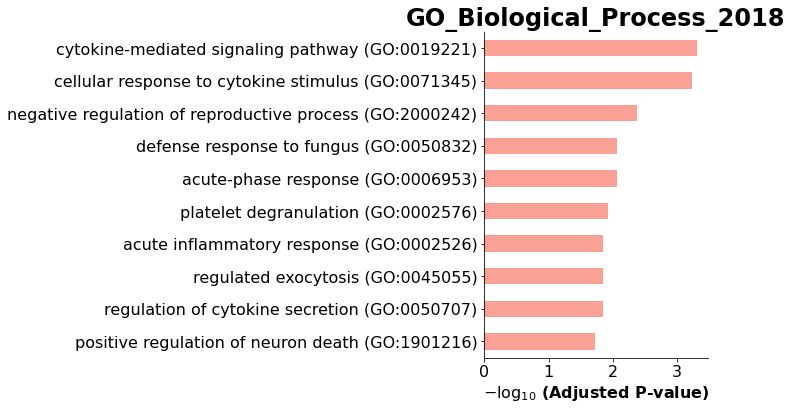

In [25]:
gene_set_analysis('1')